# PUNTO 1 — ANÁLISIS PRELIMINAR DEL PROBLEMA

Se importaron las librerías necesarias (pandas, numpy, matplotlib, seaborn) y se cargó el dataset de Alzheimer. 




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

Se hizo una revisión general de  los datos con df.head() para identificar visualmente las variables numéricas y categóricas.

In [4]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

# Cargar dataset
df = pd.read_csv("alzheimers_disease_data.csv")

TARGET = "Diagnosis"   # ajusta si el target tiene otro nombre

display(Markdown("### Primeras filas del dataset"))
display(df.head())
display(df.info())

### Primeras filas del dataset

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

None

### Clasificación de las variables

Se definió la variable objetivo como (*Diagnosis*). Debido a que el objetivo es determinar si un determinado paciente, con distintos factores médicos tiene o no la enfermedad. Dado que "diagnosis" puede ser 1 o 0 dependiendo de si tiene o no Alzheimer, este será un problema de clasificación.

Parece que el dataset ya está preprocesado para Machine Learning y todas las características son númericas, hasta aquellas categóricas. Aún asi, es importante distinguir entre las que corresponden a un número o a una categoría.

#### Numéricas
- Age (Edad)
- BMI (Body Mass Index)
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality
- SystolicBP
- DiastolicBP 
- CholesterolTotal
- CholesterolLDL
- CholesterolHDL
- CholesterolTriglycerides
- MMSE
- FunctionalAssessment
- ADL

#### Binarias
- Gender
- Smoking
- FamilyHistoryAlzheimers
- CardiovascularDisease
- Diabetes
- Depression
- HeadInjury
- Hypertension
- MemoryComplaints
- BehavioralProblems
- Confusion
- Disorientation
- PersonalityChanges
- DifficultyCompletingTasks
- Forgetfulness
- Diagnosis

#### Ordinales
- EducationLevel

#### Categóricas
- Ethnicity
- DoctorInCharge (Por confidencialidad no aparece, entonces se elimina)

#### Otro
- PatientID (Uno por paciente, no es útil para entrenamiento)

A continuación se separa el dataset en tipos de variables.

In [5]:
TARGET = "Diagnosis"

# Variables numéricas
num_cols = [
    "Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", 
    "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", 
    "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", 
    "MMSE", "FunctionalAssessment", "ADL"
]

# Variables categóricas o binarias
cat_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension",
    "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation",
    "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"
]

# Variables que no se usan como predictores
id_cols = ["PatientID", "DoctorInCharge"]

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)


Numéricas: ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categóricas: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


# PUNTO 2 — ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Objetivos:
- Mostrar distribuciones de variables.
- Generar estadísticos descriptivos.
- Calcular correlaciones entre variables numéricas.
- Analizar la relación entre variables predictoras y el target.


### Distribuciones y estadísticos descriptivos  
Primero se analizó la distribución del objetivo para verificar si existe un desbalance de clasificaciones.  
Luego se graficaron los histogramas de las variables numéricas, lo que ayuda a detectar sesgos, valores extremos y posibles transformaciones necesarias.  
Finalmente, se calcularon los estadísticos descriptivos (media, mediana, desviación estándar, etc.), que muestran los rangos y la variabilidad de los datos.


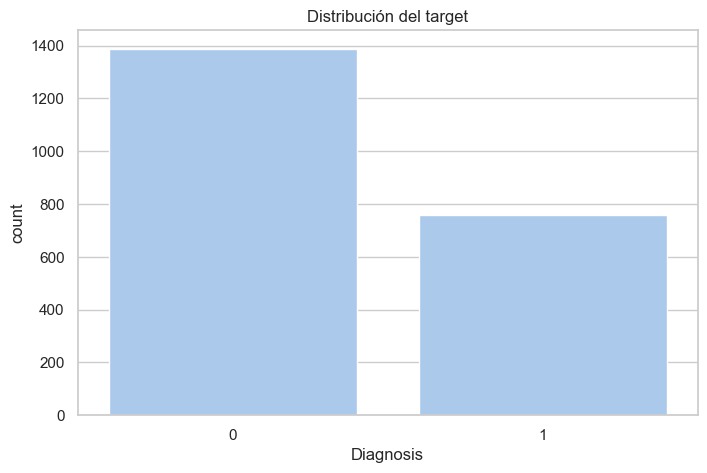

In [15]:
# Distribución del target
sns.countplot(x=TARGET, data=df)
plt.title("Distribución del target")
plt.show()

Si una clase es mucho mayor que la otra el dataset está desbalanceado, en este caso se ve que hay aproximadamente el doble de registros de pacientes sin Alzheimer que diagnosticados.

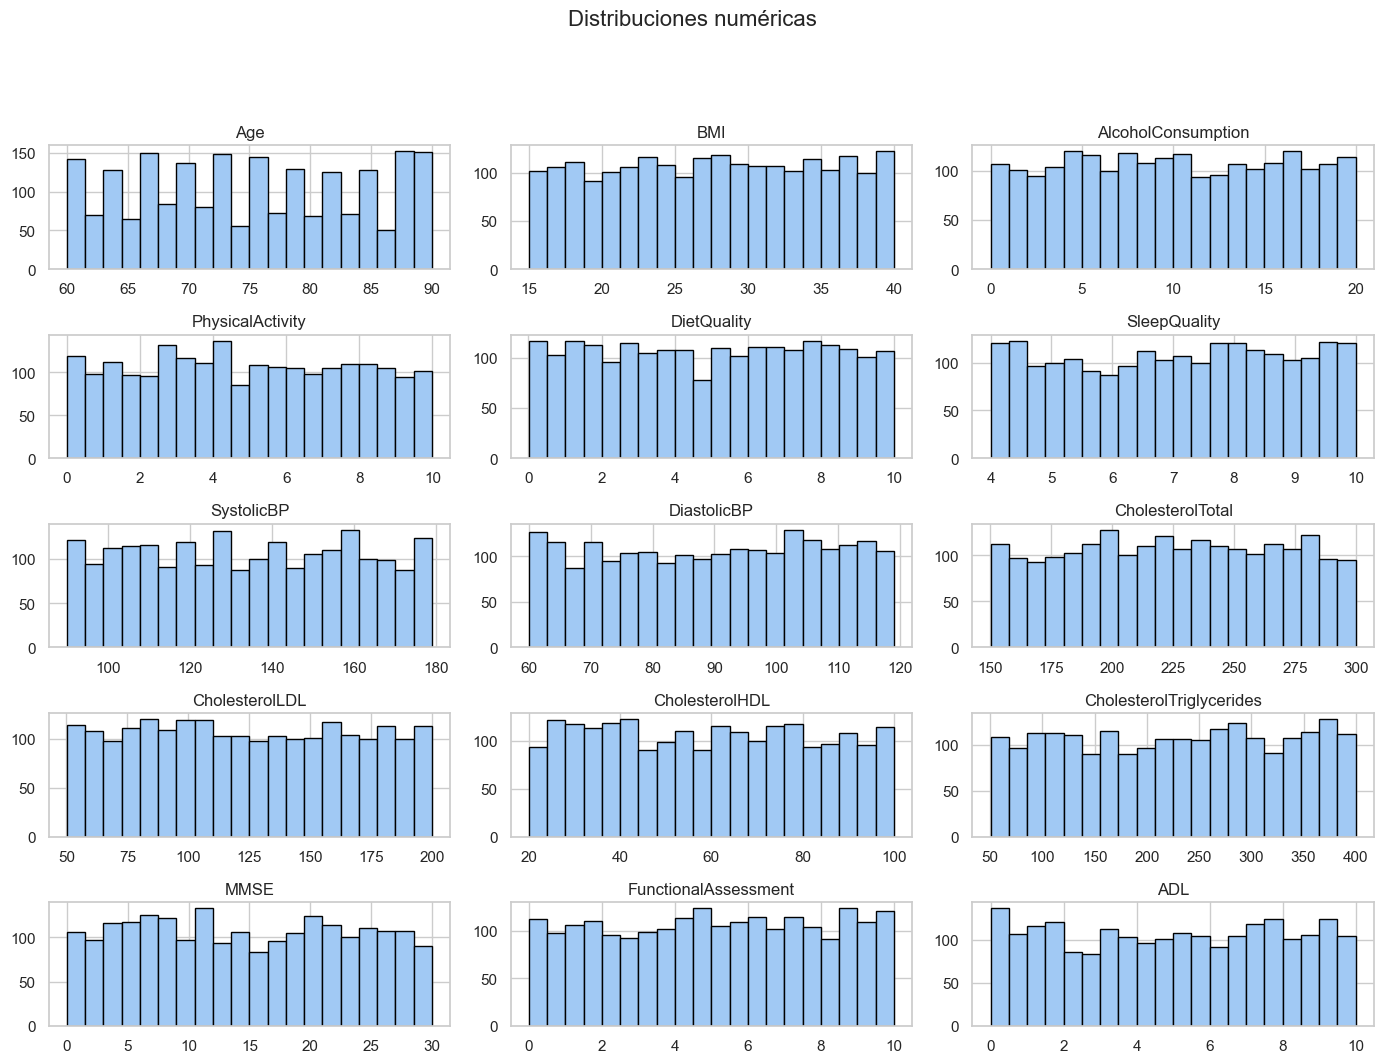

In [18]:
df[num_cols].hist(
    bins=20, 
    figsize=(14, 12), 
    layout=(len(num_cols)//3 + 1, 3), 
    edgecolor="black"
)
plt.suptitle("Distribuciones numéricas", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Se evidencia que en general, los datos estan distribuidos uniformemente. Los datos que presentan más variabilidad, son los de edad, aunque se evidencia que siguen siendo relativamente uniformes.

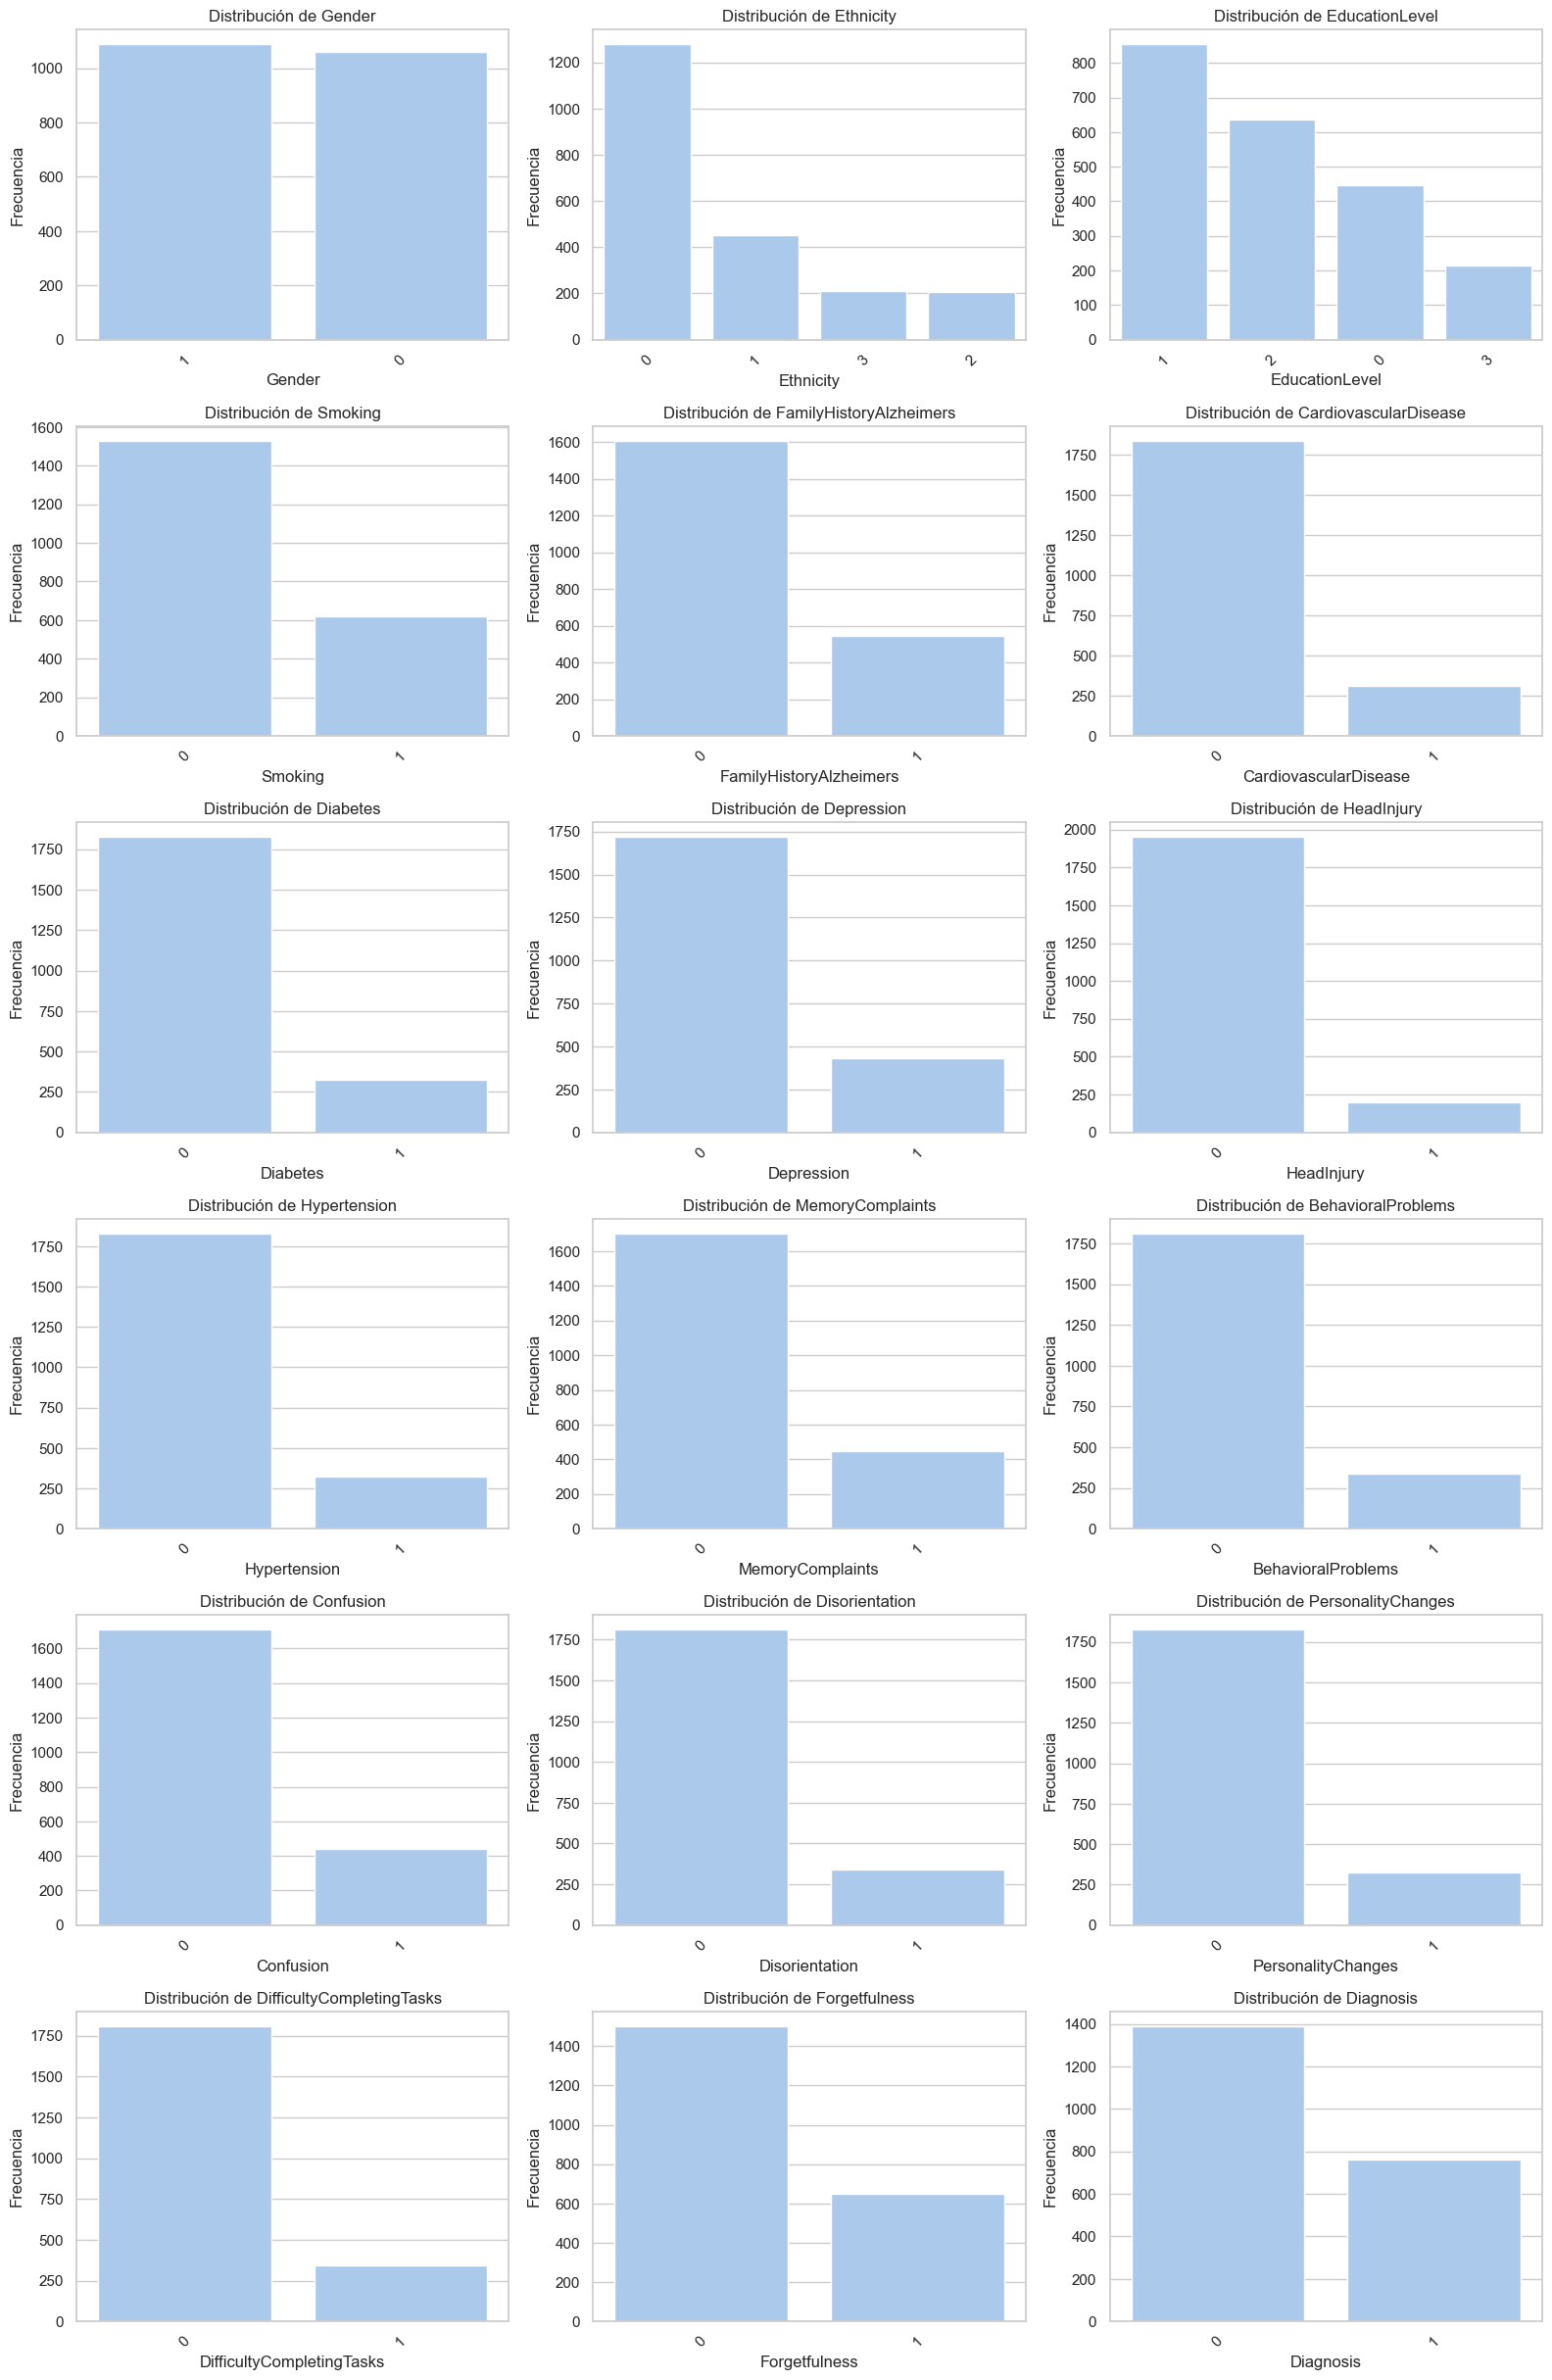

In [22]:
n_cols = 3  
n_rows = len(cat_cols) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Se evidencia que en la varible género hay una división cerca de uniforme, pero en el resto se notan claras diferencias. En las variables categóricas de educación y etnicidad, se ve que predomina una y decae rapidamente, mientras que en las binarias se evidencia que existen más datos de pacientes sin el síntoma asociado que aquellos con el síntoma, a veces por un márgen significativo.

In [24]:
# Estadísticos descriptivos
desc = df[num_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


### Correlaciones entre variables  númericas
Se construyó una matriz de correlación para las variables numéricas y se visualizó con un mapa de calor.  
Esto permite detectar relaciones lineales fuertes (positivas o negativas) que pueden indicar multicolinealidad.  
También se listaron los pares de variables con correlaciones altas, lo cual ayuda a decidir si alguna debería ser eliminada o combinada en el preprocesamiento.


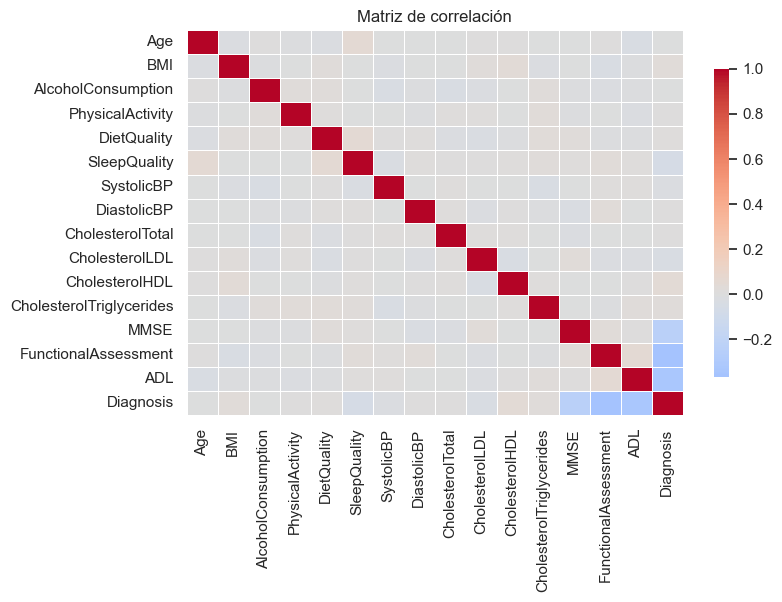

In [ ]:
# Heatmap correlaciones numéricas
corr = df[num_cols + [TARGET]].corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,      
    fmt=".2f",          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de correlación")
plt.show()

# Pares con correlación alta
high_corr = [(c1,c2,corr.loc[c1,c2]) for i,c1 in enumerate(num_cols) for c2 in num_cols[i+1:] if abs(corr.loc[c1,c2])>=0.7]



Se evidencia que la mayoría de variables no poseen correlación entre si, aunque para diagnosis, se evidencia un nivel bajo de correlación inversa con MMSE, FunctionalAssesment, ADL.

### Gráfico de barras apiladas

Permite ver que tanto porcentaje de una categória está clasificado de que manera. Se evidencia que para muchas categorías no hay preferencia entre una u otra, pero en algunas como en memoryComplaints y BehavioralIssues, se evidencia un desbalance en la clasificación.

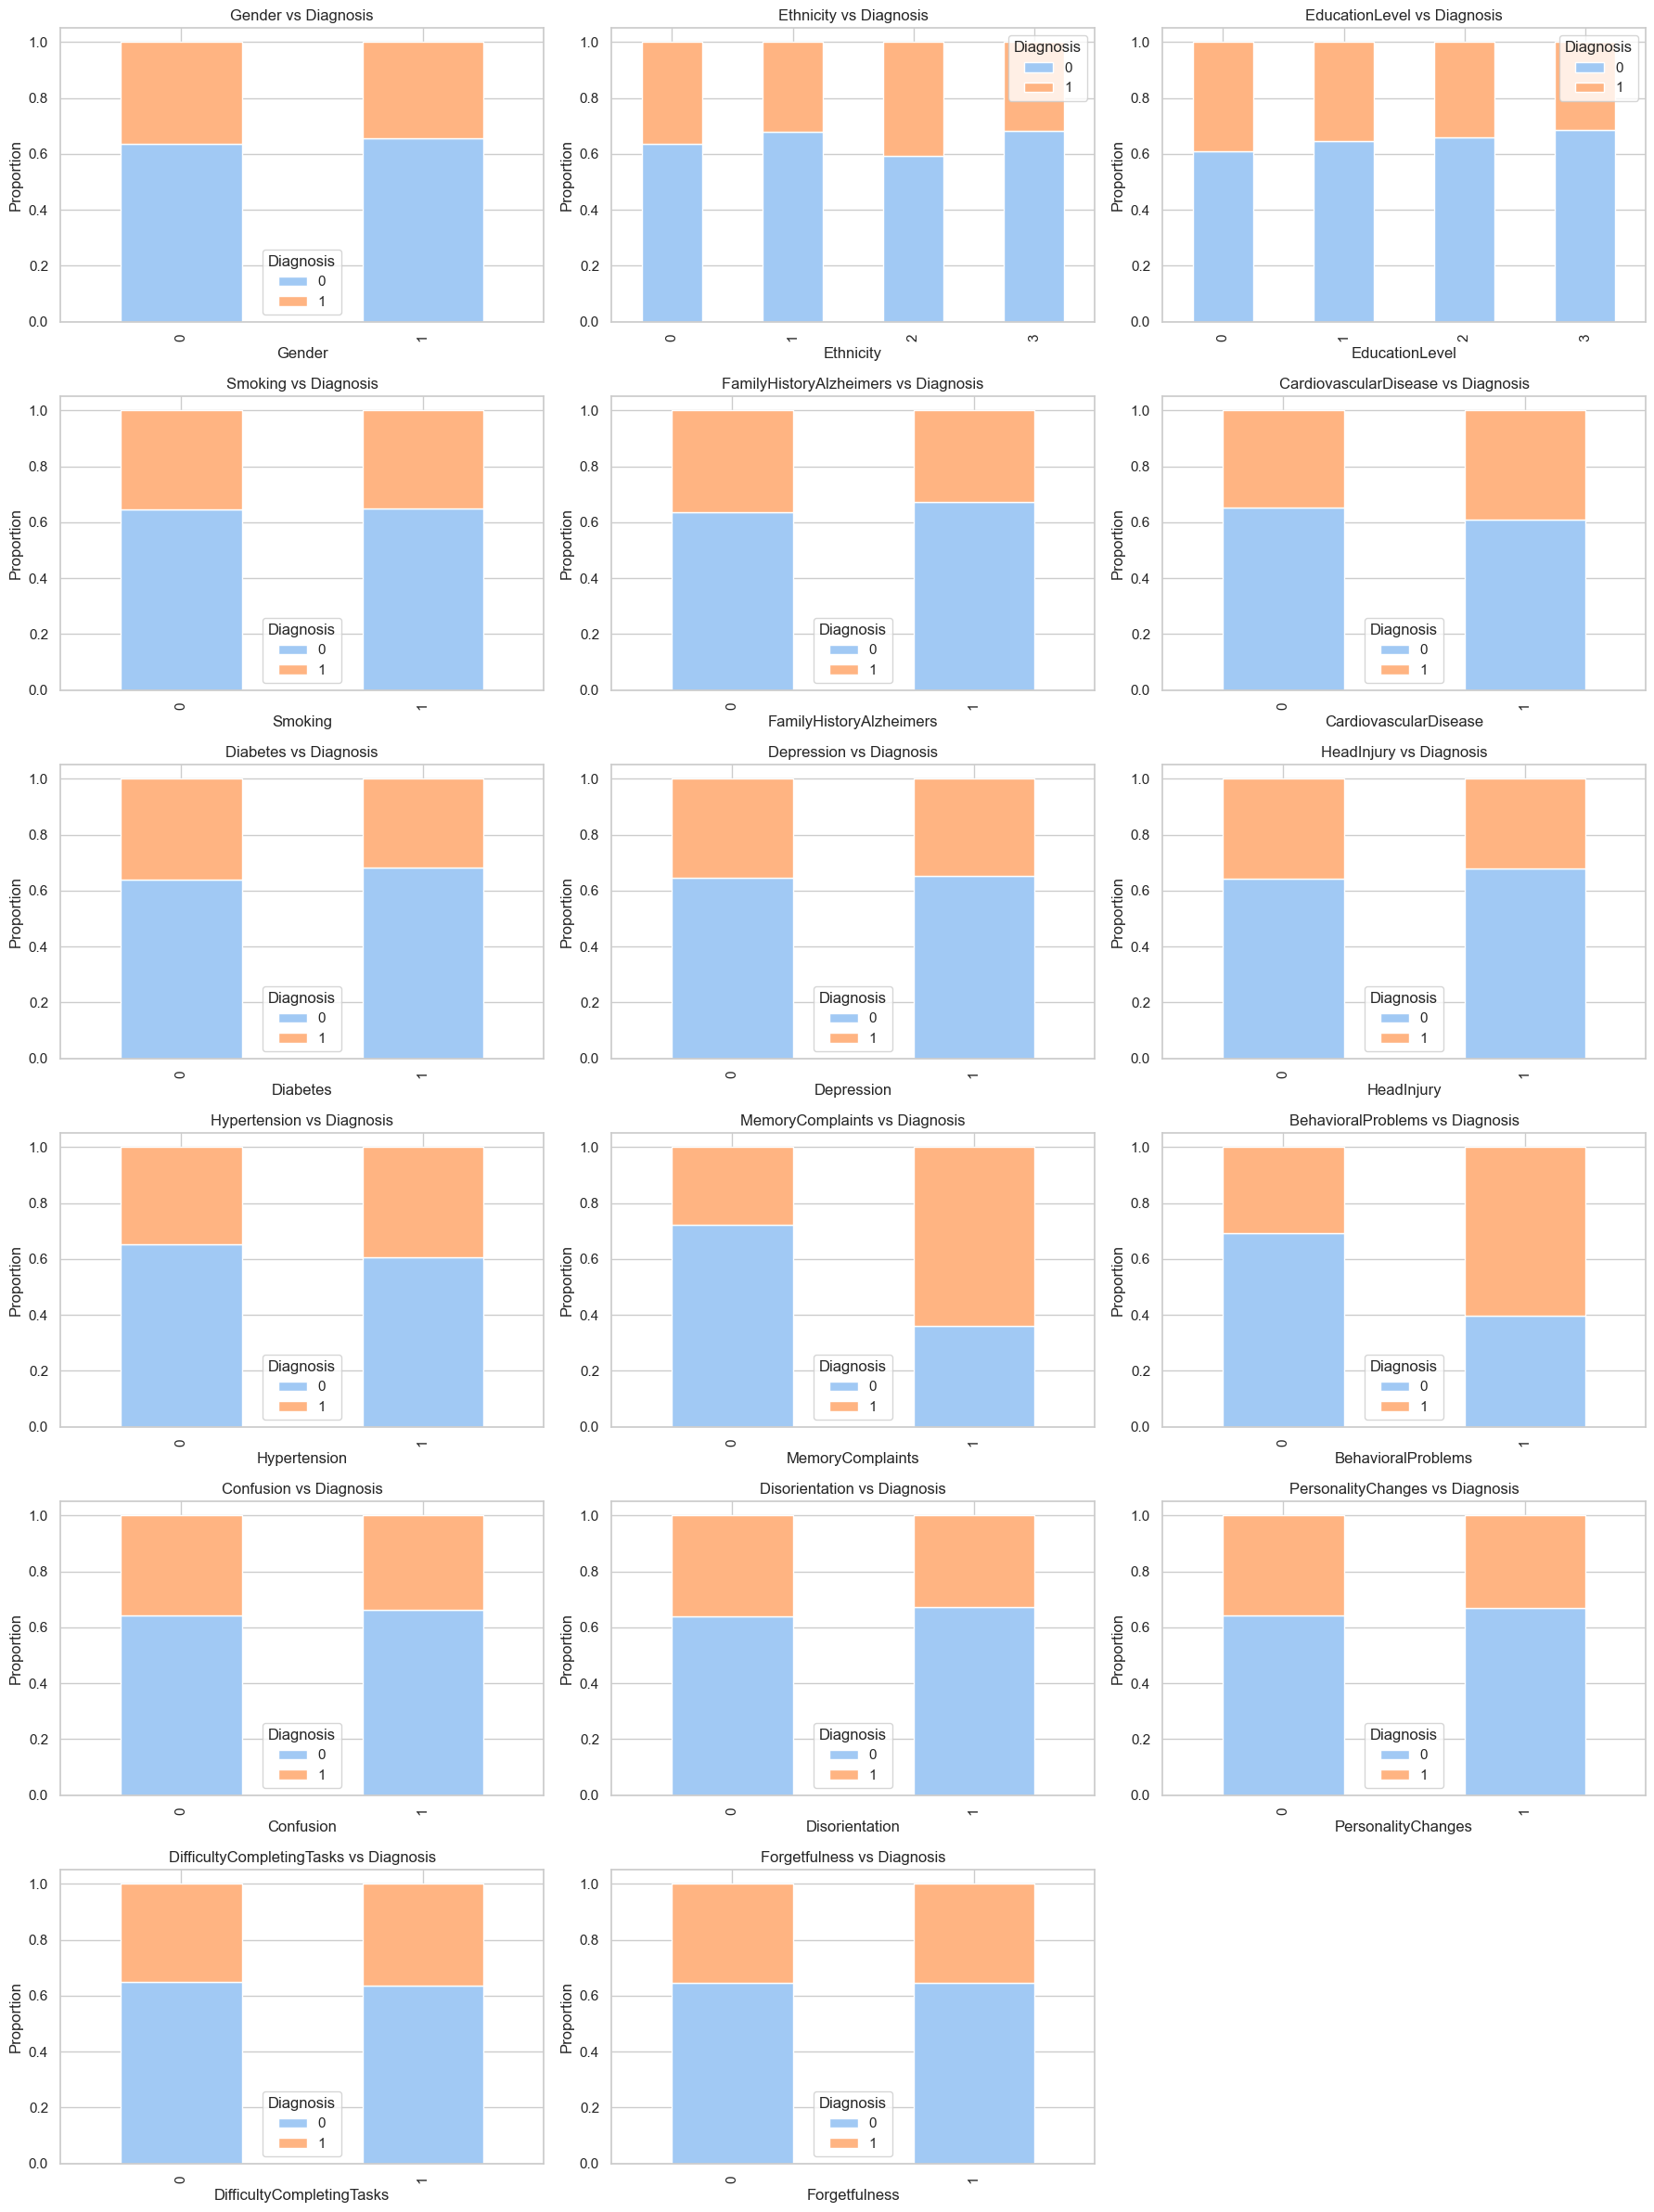

In [ ]:
n_cols = 3
n_rows = len([c for c in cat_cols if c != TARGET]) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate([c for c in cat_cols if c != TARGET]):
    ct = pd.crosstab(df[col], df[TARGET], normalize="index")
    ct.plot(kind="bar", stacked=True, ax=axes[i])
    axes[i].set_title(f"{col} vs {TARGET}")
    axes[i].set_ylabel("Proportion")

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Se evidencia que los síntomas cognitivos y conductuales como quejas de memoria, problemas de comportamiento, desorientación y dificultad para completar tareas tienen una mayor asociación con diagnósticos positivos. En contraste, factores médicos como diabetes, hipertensión o tabaquismo no muestran diferencias claras entre grupos. Asimismo, variables demográficas como género, etnia o nivel educativo parecen tener menor influencia en el diagnóstico. En general, los síntomas relacionados con deterioro cognitivo resultan más determinantes que las condiciones de salud general o factores sociodemográficos.



### Relación entre variables predictoras y el target  
Se analizaron las variables numéricas más correlacionadas con el *Diagnosis* mediante boxplots, mostrando diferencias en medianas y distribución entre clases.  
También se exploraron variables categóricas con gráficos de barras para ver la proporción de diagnósticos en cada categoría.  
Este análisis permite identificar qué variables son más relevantes para predecir la enfermedad.


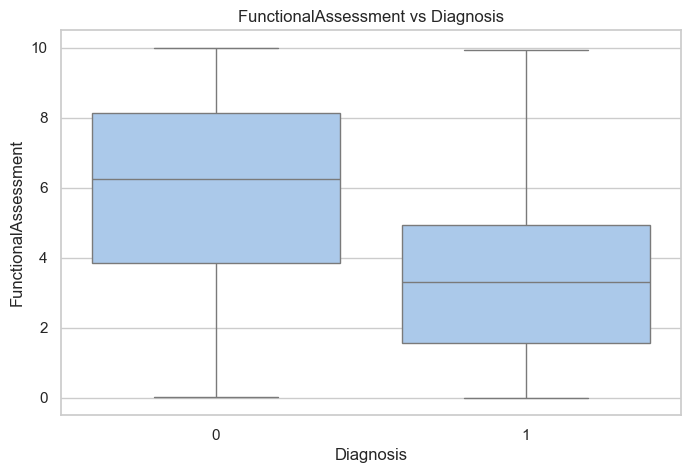

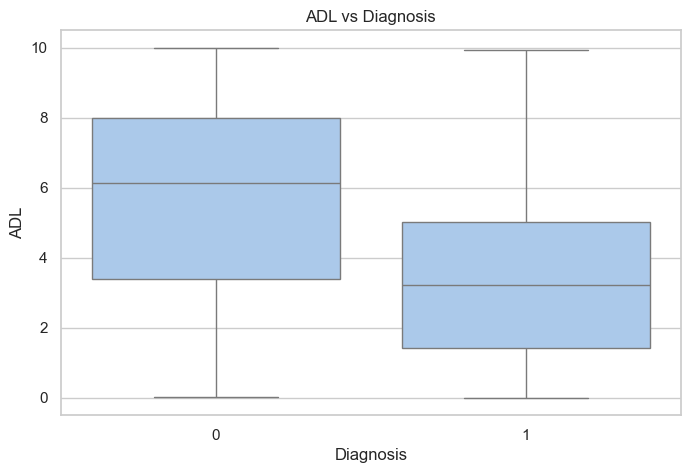

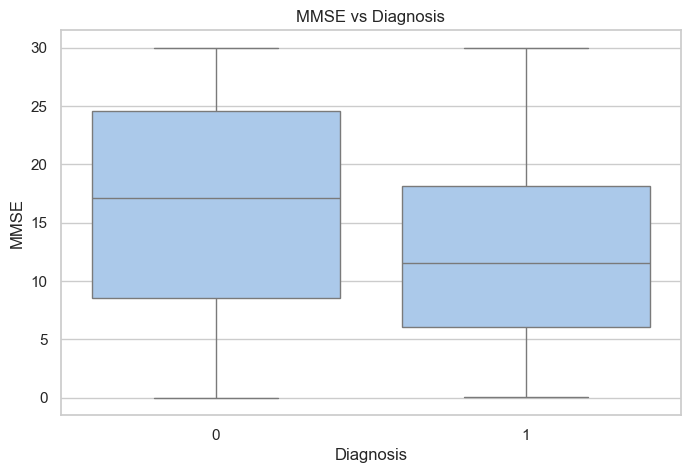

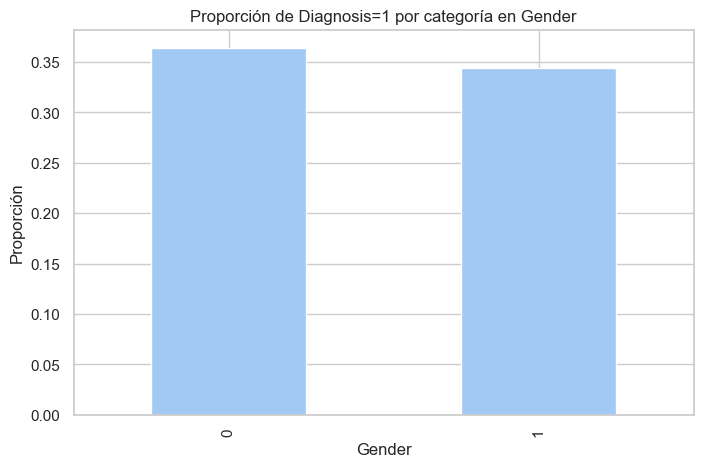

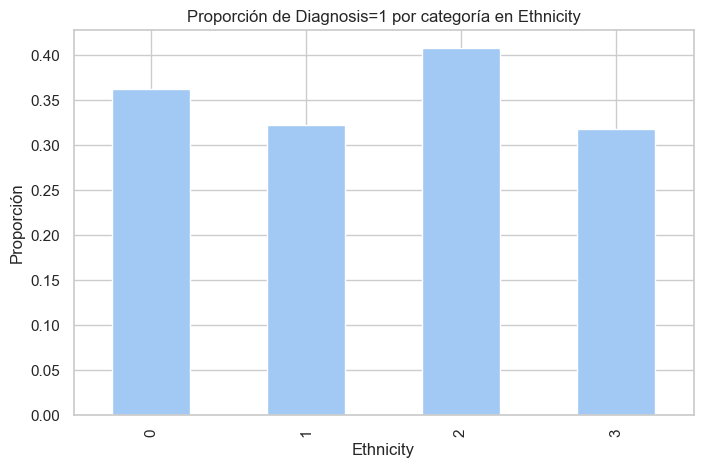

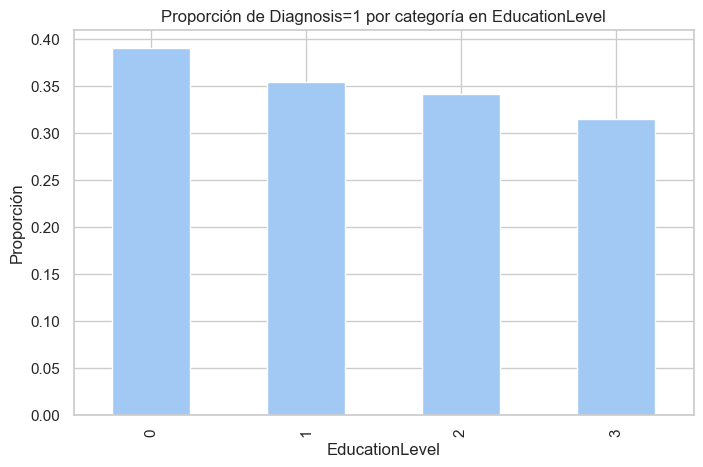

In [40]:
# Variables numéricas más correlacionadas con el target
corr_with_target = df[num_cols+[TARGET]].corr()[TARGET].drop(TARGET).abs().sort_values(ascending=False)
top_num = corr_with_target.head(3).index.tolist()

for col in top_num:
    sns.boxplot(x=TARGET, y=col, data=df)
    plt.title(f"{col} vs {TARGET}")
    plt.show()
    
# Relación categóricas vs target (proporción)
for col in cat_cols[:3]:
    prop = df.groupby(col)[TARGET].mean()
    prop.plot(kind="bar")
    plt.title(f"Proporción de {TARGET}=1 por categoría en {col}")
    plt.ylabel("Proporción")
    plt.show()

Se evidencia que los pacientes con diagnóstico positivo tienden a tener valores más bajos en las evaluaciones funcionales (FunctionalAssessment y ADL), lo que refleja una disminución en la autonomía. Asimismo, en el test cognitivo MMSE se observa que quienes presentan el diagnóstico muestran puntajes significativamente menores, indicando un deterioro cognitivo asociado a la condición. También se puede ver una ligera correlación entre el nivel de educación y la proporción de diagnosis de la enfermedad, siendo que entre menor nivel de educación, mayor será la posibilidad de ser diagnosticado.


# PUNTO 3 — PROCESAMIENTO DE DATOS

Objetivos:
- Manejar valores nulos en variables numéricas y categóricas.
- Codificar variables categóricas para uso en modelos.
- Normalizar o estandarizar variables numéricas.
- Implementar un pipeline de preprocesamiento con scikit-learn.
- Dividir los datos en conjuntos de entrenamiento, validación y prueba.

Cada bloque presenta el código de implementación seguido de una breve explicación.

---

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

### Manejo de valores nulos

En datos reales es común encontrar valores faltantes. Se pueden imputar usando la mediana (numéricos) o la moda (categóricos).

In [7]:
# Imputador para variables numéricas
imputer_num = SimpleImputer(strategy="median")

# Imputador para variables categóricas
imputer_cat = SimpleImputer(strategy="most_frequent")


### Codificación de variables categóricas

Los algoritmos necesitan valores numéricos. Usamos OneHotEncoder, que convierte cada categoría en columnas binarias.

In [ ]:
# Codificador OneHot para variables categóricas
encoder = OneHotEncoder(handle_unknown="ignore")

### Normalización/Estandarización

La estandarización transforma las variables numéricas para que tengan media 0 y desviación estándar 1, lo cual mejora el rendimiento de algoritmos sensibles a magnitudes como kNN o redes neuronales.

In [9]:
# Escalador estándar para variables numéricas
scaler = StandardScaler()

### Pipeline de preprocesamiento

Agrupamos las transformaciones en un ColumnTransformer para que se apliquen automáticamente según el tipo de variable.

In [ ]:
# Separar variables predictoras y target
TARGET = "Diagnosis"

# Variables numéricas
num_cols = [
    "Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", 
    "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", 
    "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", 
    "MMSE", "FunctionalAssessment", "ADL"
]

# Variables categóricas o binarias
cat_cols = [
    "Gender", "Ethnicity", "EducationLevel", "Smoking", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury", "Hypertension",
    "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation",
    "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"
]

# Variables que no se usan como predictores
id_cols = ["PatientID", "DoctorInCharge"]

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

In [ ]:
X = df.drop(columns=[TARGET, "PatientID", "DoctorInCharge"]) # eliminar columnas irrelevantes
y = df[TARGET]

# 3. Definir transformaciones para cada tipo
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# 4. Pipeline completo
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


Numéricas: ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categóricas: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


### División del dataset

Dividimos los datos en train (70%), validación (15%) y test (15%), manteniendo la proporción de clases (estratificación).

In [13]:
# Train (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# De X_temp sacar validación (15%) y test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Train: (1504, 32)
Val: (322, 32)
Test: (323, 32)


### Aplicación del preprocesamiento

Finalmente, aplicamos el preprocesador a cada subconjunto de datos.

In [14]:
# Ajustar con el train y transformar los tres conjuntos
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Shape procesado:", X_train_processed.shape)


Shape procesado: (1504, 53)


# PUNTO 4 — ENTRENAMIENTO DE MODELOS

Objetivos:

Entrenar y evaluar 3 modelos distintos (kNN, Random Forest, DNN).

Comparar su desempeño en train, val y test.

Analizar posibles casos de overfitting y underfitting.

### Modelo 1: k-Nearest Neighbors (kNN)

kNN clasifica un ejemplo nuevo según la mayoría de sus k vecinos más cercanos. Es sensible a la escala de las variables (por eso normalizamos antes).

In [17]:
# Definir modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar
knn.fit(X_train_processed, y_train)

# Evaluación
acc_knn_train = accuracy_score(y_train, knn.predict(X_train_processed))
acc_knn_val   = accuracy_score(y_val, knn.predict(X_val_processed))
acc_knn_test  = accuracy_score(y_test, knn.predict(X_test_processed))

print("kNN -> Train:", acc_knn_train, "Val:", acc_knn_val, "Test:", acc_knn_test)


kNN -> Train: 0.8397606382978723 Val: 0.7639751552795031 Test: 0.7368421052631579


### Modelo 2: Random Forest

Random Forest es un método de ensamble basado en muchos árboles de decisión. Reduce el riesgo de overfitting comparado con un solo árbol.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Definir modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=200,   # número de árboles
    max_depth=None,     # profundidad libre
    random_state=42
)

# Entrenar
rf.fit(X_train_processed, y_train)

# Evaluación
acc_rf_train = accuracy_score(y_train, rf.predict(X_train_processed))
acc_rf_val   = accuracy_score(y_val, rf.predict(X_val_processed))
acc_rf_test  = accuracy_score(y_test, rf.predict(X_test_processed))

print("Random Forest -> Train:", acc_rf_train, "Val:", acc_rf_val, "Test:", acc_rf_test)


Random Forest -> Train: 1.0 Val: 0.9440993788819876 Test: 0.9504643962848297


### Modelo 3: Deep Neural Network (DNN)

Red neuronal profunda con al menos 3 capas ocultas, activación ReLU, regularización con Dropout, y salida con sigmoide (porque es clasificación binaria).

In [ ]:
# Definir arquitectura de la red
dnn = models.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # salida binaria
])

# Compilar modelo
dnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar (usando validación)
history = dnn.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=30, batch_size=32, verbose=0
)

# Evaluación
acc_dnn_train = dnn.evaluate(X_train_processed, y_train, verbose=0)[1]
acc_dnn_val   = dnn.evaluate(X_val_processed, y_val, verbose=0)[1]
acc_dnn_test  = dnn.evaluate(X_test_processed, y_test, verbose=0)[1]

print("DNN -> Train:", acc_dnn_train, "Val:", acc_dnn_val, "Test:", acc_dnn_test)


DNN -> Train: 0.9760638475418091 Val: 0.8385093212127686 Test: 0.8544891476631165


### Tabla comparativa de desempeño

Organizamos los resultados en una tabla clara.

In [14]:
import pandas as pd

results = pd.DataFrame({
    "Modelo": ["kNN", "Random Forest", "DNN"],
    "Train": [acc_knn_train, acc_rf_train, acc_dnn_train],
    "Val": [acc_knn_val, acc_rf_val, acc_dnn_val],
    "Test": [acc_knn_test, acc_rf_test, acc_dnn_test]
})

print(results)


          Modelo     Train       Val      Test
0            kNN  0.831782  0.742236  0.736842
1  Random Forest  1.000000  0.934783  0.953560
2            DNN  0.980053  0.860248  0.826625


# PUNTO 5  — PRUEBA CON MUESTRA ARTIFICIAL
Genere una muestra artificial (nueva) con características inventadas, ingrésela al modelo seleccionado y analice la predicción.

Utilaremos SMOTE, que es una técnica de sobremuestreo que genera muestras sintéticas a partir de clases minoritarias. Se utiliza para obtener un conjunto de entrenamiento sintéticamente equilibrado o casi equilibrado.



In [22]:
from imblearn.over_sampling import SMOTE

# Instanciamos SMOTE
smote = SMOTE(random_state=42)

# Aplicamos SMOTE SOLO al train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Antes SMOTE:", X_train_processed.shape, y_train.value_counts())
print("Después SMOTE:", X_train_resampled.shape, y_train_resampled.value_counts())


Antes SMOTE: (1504, 53) Diagnosis
0    972
1    532
Name: count, dtype: int64
Después SMOTE: (1944, 53) Diagnosis
0    972
1    972
Name: count, dtype: int64


Ahora lo evaluamos con los modelos

In [24]:
# Definir modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar
knn.fit(X_train_processed, y_train)

# Evaluación
acc_knn_train = accuracy_score(y_train, knn.predict(X_train_processed))
acc_knn_val   = accuracy_score(y_val, knn.predict(X_val_processed))
acc_knn_test  = accuracy_score(y_test, knn.predict(X_test_processed))

print("kNN -> Train:", acc_knn_train, "Val:", acc_knn_val, "Test:", acc_knn_test)

# Evaluación random forest
acc_rf_resampled = accuracy_score(y_train_resampled, rf.predict(X_train_resampled))

print("Random Forest -> Train:", acc_rf_train, "Val:", acc_rf_val, "Test:", acc_rf_test, "Train_resamapled:", acc_rf_resampled)

# Definir arquitectura de la red
dnn = models.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # salida binaria
])

# Compilar modelo
dnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar (usando validación)
history = dnn.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=30, batch_size=32, verbose=0
)

# Evaluación
acc_dnn_train = dnn.evaluate(X_train_processed, y_train, verbose=0)[1]
acc_dnn_val   = dnn.evaluate(X_val_processed, y_val, verbose=0)[1]
acc_dnn_test  = dnn.evaluate(X_test_processed, y_test, verbose=0)[1]

print("DNN -> Train:", acc_dnn_train, "Val:", acc_dnn_val, "Test:", acc_dnn_test)


kNN -> Train: 0.8397606382978723 Val: 0.7639751552795031 Test: 0.7368421052631579
Random Forest -> Train: 1.0 Val: 0.9440993788819876 Test: 0.9504643962848297 Train_resamapled: 0.9830246913580247
DNN -> Train: 0.9734042286872864 Val: 0.8571428656578064 Test: 0.8204334378242493


In [25]:
results = pd.DataFrame({
    "Modelo": ["kNN", "Random Forest", "DNN"],
    "Train": [acc_knn_train, acc_rf_train, acc_dnn_train],
    "Val": [acc_knn_val, acc_rf_val, acc_dnn_val],
    "Test": [acc_knn_test, acc_rf_test, acc_dnn_test]
})

print(results)

          Modelo     Train       Val      Test
0            kNN  0.839761  0.763975  0.736842
1  Random Forest  1.000000  0.944099  0.950464
2            DNN  0.973404  0.857143  0.820433


Los resultados con la muestra artificial train_resampled nos generó un puntaje menor que el puntaje obtenido con el mismo sub dataset train, pero nos dio mejor puntaje que los obtenidos con val y test. Esto se explica porque gran parte de la muestra artificial train_resampled abarca datos que fueron entranados con el modelo, sin embargo dio menor por las muestras artificiales obtenidas con SMOTE. Incluso así, es un resultado satisfactorio ya que estuvo mejor que val y test.

# PUNTO 6 — INVESTIGUE Y EXPLIQUE LAS SIGUIENTES ESTRATEGIAS
- K-Fold Cross Validation: 
La Validación Cruzada K-Fold es un procedimiento que evalúa modelos de machine learning en un conjunto de datos limitado. El conjunto se divide en k pliegues o "folds" de igual tamaño. El modelo se entrena en k-1 pliegues y se valida en el pliegue restante. Este proceso se repite k veces, usando un pliegue diferente para la validación en cada iteración. La puntuación de rendimiento final es el promedio de las k puntuaciones de validación.

- Leave-One-Out Cross Validation (LOOCV): 
Leave-One-Out Cross-Validation (LOOCV) es un caso especial de K-Fold donde el número de pliegues k es igual al número de puntos de datos n en el conjunto. Para cada iteración, se utiliza un único punto de dato como conjunto de validación, mientras que los n-1 puntos restantes se usan para el entrenamiento. Este proceso se repite n veces, y la puntuación final es el promedio de las n puntuaciones individuales.


¿Son aplicables estas estrategias al dataset elegido?

Sí, ambas estrategias son aplicables al conjunto de datos elegido (el cual contiene 2149 entradas),pero la K-Fold cross validation (con k=5 o k=10) sería una opción más llamativa para este caso. Aunque es posible aplicar LOOCV, sería costoso computacionalmente porque para hacerlo tendríamos que entrenar el modelo 2149 veces, y esto no es eficiente para un conjunto de datos de este tamaño.

¿Qué beneficios tendrían frente al esquema de validación tradicional (train/val/test)?

- Evaluación robusta: Con una sola divisón se tendremos resultados muy dependientes de la suerte del muestreo, a cambio la validación cruzada utiliza todos los puntos de datos tanto para el entrenamiento como para la validación. Esto proporciona una estimación más estable y fiable de cómo el modelo se comportará frente a datos nuevos.
- Uso eficiente de datos: La validación cruzada asegura que se utilicen todos los datos disponibles para la evaluación del modelo. Con una sola división el conjunto de prueba se usa una sola vez lo cual puede ser un problema si el conjunto de datos es pequeño. Al entrenar en k-1 pliegues el modelo se expone a una mayor cantidad de datos durante la fase de aprendizaje.
- Reducción de la varianza: Al promediar los resultados en varias iteraciones la validación cruzada ayuda a reducir la varianza de la estimación de rendimiento, lo que da una mejor idea de cómo el modelo se comportará en diferentes subconjuntos de datos.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64